# 신경망의 추론

## 미니배치 버전 파이썬 구현

In [ ]:
import numpy as np

W1 = np.random.rand(2, 4)

In [ ]:
W1

In [ ]:
b1 = np.random.rand(4)
print(b1.shape)

In [ ]:
b1

In [ ]:
x = np.random.rand(10, 2)

In [ ]:
x

In [ ]:
h = np.matmul(x, W1) + b1  # (10,2)(2,4)+(4,)

In [ ]:
print(h.shape)
print(h)

## 시그모이드 함수

In [10]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

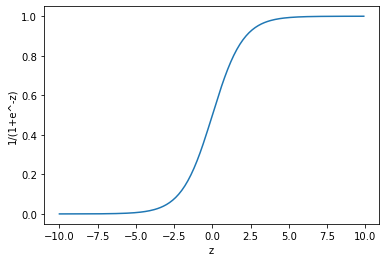

In [11]:
import matplotlib.pyplot as plt
zs = np.arange(-10., 10., 0.1)
gs = [sigmoid(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [21]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

x = np.random.rand(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.rand(4)
W2 = np.random.randn(4, 3)
b2 = np.random.rand(3)

h = np.matmul(x, W1) + b1  # (10,2)(2,4)+(4,)
a = sigmoid(h)             # (10,4)
s = np.matmul(a, W2) + b2  # (10,4)(4,3)+(3,)

In [22]:
print(h.shape)
print(h)

(10, 4)
[[ 0.26383317 -0.13469313 -0.1746729   0.06691328]
 [ 0.60734001  0.32144572 -0.259632   -0.26472555]
 [ 0.29276716 -0.1579099  -0.07260997  0.11762591]
 [ 0.06616602  0.51432185 -1.74090592 -0.90527247]
 [ 0.14924484  0.13268317 -0.88972947 -0.35776615]
 [ 0.11059558  0.06165024 -0.84524349 -0.2953019 ]
 [ 0.62442441  0.48249999 -0.50903852 -0.45777069]
 [ 0.34774254 -0.04569993 -0.1556829   0.01452139]
 [ 0.24845055  0.14528878 -0.70317629 -0.30154208]
 [ 0.10622933  0.58638877 -1.7842466  -0.96802537]]


In [23]:
print(a.shape)
print(a)

(10, 4)
[[0.56557834 0.46637753 0.45644247 0.51672208]
 [0.64733378 0.57967655 0.43545417 0.43420242]
 [0.57267345 0.46060435 0.48185548 0.52937262]
 [0.51653547 0.62581907 0.1491979  0.28796821]
 [0.53724211 0.53312222 0.29116566 0.41150042]
 [0.52762075 0.51540768 0.30043159 0.42670637]
 [0.65122414 0.61833804 0.37541895 0.38751481]
 [0.58607004 0.48857701 0.4611577  0.50363028]
 [0.56179509 0.53625844 0.33110838 0.42518055]
 [0.52653239 0.64253613 0.14377956 0.27527426]]


In [24]:
print(s.shape)
print(s)

(10, 3)
[[-0.35717499  0.11651739  0.1536909 ]
 [-0.063664   -0.0232528   0.24150763]
 [-0.44229311  0.10717764  0.12231435]
 [ 0.87917556  0.09189693  0.606493  ]
 [ 0.26108331  0.13472499  0.37866988]
 [ 0.19764355  0.15272128  0.35804612]
 [ 0.18898391 -0.03512675  0.32989685]
 [-0.32519422  0.0832779   0.16101362]
 [ 0.14984754  0.10511372  0.33389582]
 [ 0.9290695   0.07265787  0.6221152 ]]


## 계층으로 클래스화 및 순전파 구현

### 파이썬 참조 계수

In [30]:
import sys
a = np.array([1,2,3])
print( sys.getrefcount(a) )
b = a
print( sys.getrefcount(a) )
print(b)
b[1] = 10
print(b)
print(a)
del b
print( sys.getrefcount(a) )

2
3
[1 2 3]
[ 1 10  3]
[ 1 10  3]
2


In [36]:
import sys

def foo():
    print('foo()')

foo()
print( sys.getrefcount(foo) )
bar = foo
print( sys.getrefcount(bar) )
bar()
del bar
print( sys.getrefcount(foo) )

foo()
2
3
foo()
2


In [37]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [39]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [38]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [41]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s.shape)
print(s)

(10, 3)
[[ 0.12855732 -2.15781098  1.50431475]
 [ 0.81151884 -1.76701496  0.99523067]
 [ 0.43198568 -2.50936758  0.40959629]
 [ 0.27643667 -2.30569528  0.99838863]
 [ 0.46974422 -2.47279748  0.39949309]
 [ 0.60644197 -2.33127821  0.5211233 ]
 [ 0.67534542 -2.17559657  0.53321426]
 [ 0.33106789 -2.1663744   1.12407338]
 [ 0.28909134 -2.36936776  0.89483068]
 [ 0.52631543 -1.99989377  1.06910849]]
